# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | ducheng
Processing Record 3 of Set 1 | mariental
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | qulsary
Processing Record 6 of Set 1 | hovd
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | teknaf
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | lititz
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | heniches'k
Processing Record 16 of Set 1 | corinto
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | mount pearl
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | tchintabaraden
Processing Record 21 of Set 1 | susuman
Processing Record 22 of Set 1 | por

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,49.44,89,100,6.02,CL,1723492389
1,ducheng,23.2373,111.5317,78.01,94,100,1.28,CN,1723492389
2,mariental,-24.6333,17.9667,64.00,15,1,10.74,NA,1723492389
3,port-aux-francais,-49.3500,70.2167,37.58,83,56,29.89,TF,1723492389
4,qulsary,46.9531,54.0198,73.65,55,31,15.30,KZ,1723492389


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,49.44,89,100,6.02,CL,1723492389
1,ducheng,23.2373,111.5317,78.01,94,100,1.28,CN,1723492389
2,mariental,-24.6333,17.9667,64.00,15,1,10.74,NaN,1723492389
3,port-aux-francais,-49.3500,70.2167,37.58,83,56,29.89,TF,1723492389
4,qulsary,46.9531,54.0198,73.65,55,31,15.30,KZ,1723492389


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

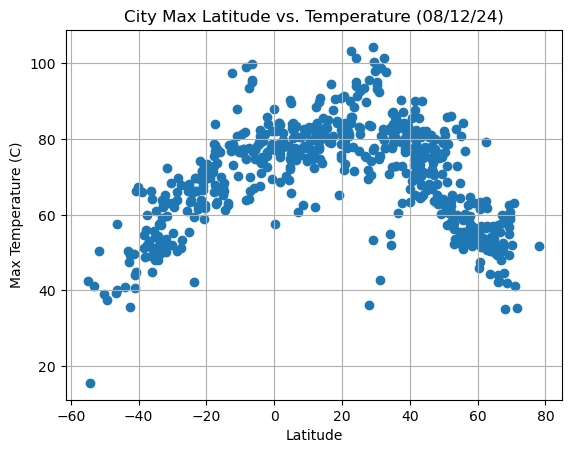

In [15]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df['Lat']
y_value = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o')
plt.title('City Max Latitude vs. Temperature (08/12/24)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

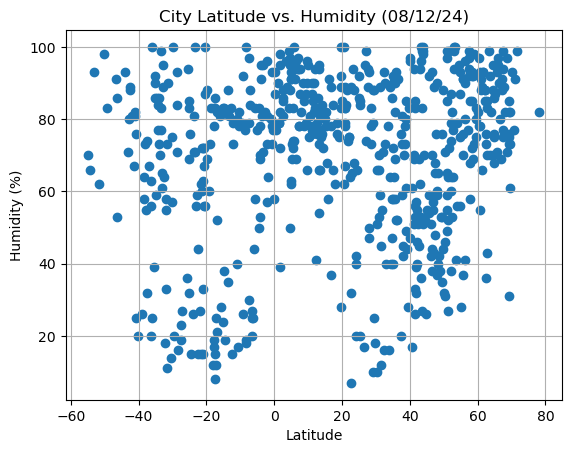

In [17]:
# Build the scatter plots for latitude vs. humidity
x_value = city_data_df['Lat']
y_value = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o')
plt.title('City Latitude vs. Humidity (08/12/24)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

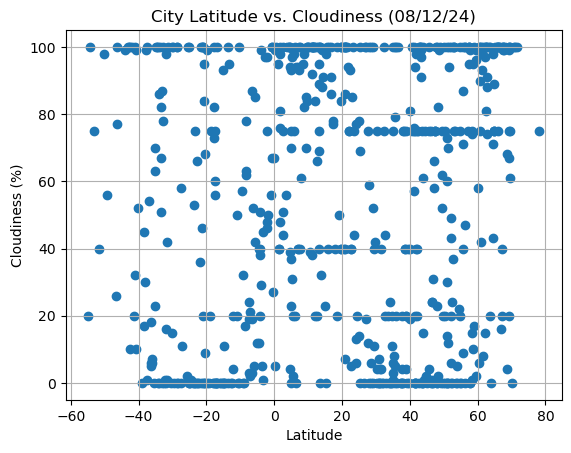

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df['Lat']
y_value = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o')
plt.title('City Latitude vs. Cloudiness (08/12/24)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

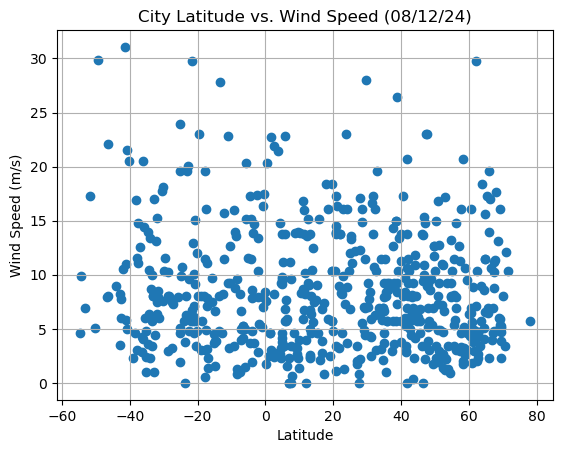

In [19]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df['Lat']
y_value = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_value, y_value, marker = 'o')
plt.title('City Latitude vs. Wind Speed (08/12/24)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ducheng,23.2373,111.5317,78.01,94,100,1.28,CN,1723492389
4,qulsary,46.9531,54.0198,73.65,55,31,15.30,KZ,1723492389
5,hovd,48.0056,91.6419,63.30,59,23,5.19,MN,1723492389
6,isafjordur,66.0755,-23.1240,44.11,95,100,13.96,IS,1723492389
8,teknaf,20.8624,92.3058,79.07,89,100,3.42,BD,1723492389


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,49.44,89,100,6.02,CL,1723492389
2,mariental,-24.6333,17.9667,64.00,15,1,10.74,NaN,1723492389
3,port-aux-francais,-49.3500,70.2167,37.58,83,56,29.89,TF,1723492389
7,edinburgh of the seven seas,-37.0676,-12.3116,52.99,67,54,12.57,SH,1723492389
9,carnarvon,-24.8667,113.6333,63.46,76,0,9.89,AU,1723492389


###  Temperature vs. Latitude Linear Regression Plot

In [23]:
# Linear regression on Northern Hemisphere
x_value_north = northern_hemi_df['Lat']
y_value_north = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_north, y_value_north)
regress_value_north = x_value_north * slope + intercept
line_eq_north = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

The r-value is: 0.0034268462703665784


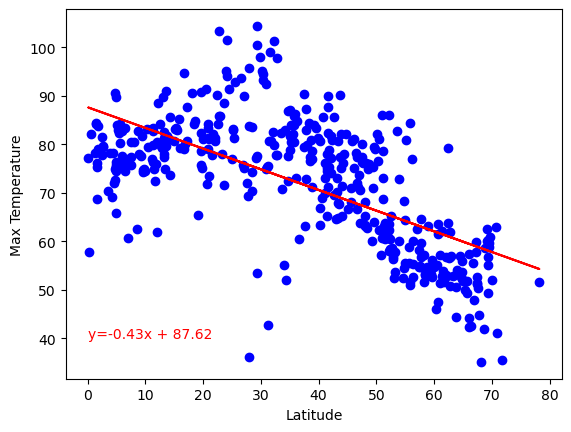

In [27]:
#Plotting
plt.scatter(x_value_north, y_value_north, marker='o', color = 'b')
plt.plot(x_value_north, regress_value_north, 'r')
plt.annotate(line_eq_north, (0,40), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.6809492448244275


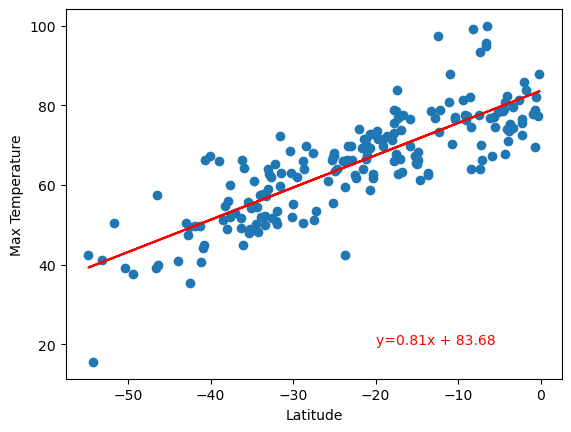

In [28]:
# Linear regression on Southern Hemisphere
x_value_s = southern_hemi_df['Lat']
y_value_s = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_s, y_value_s)
regress_value_s = x_value_s * slope + intercept
line_eq_s = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_s, y_value_s, marker='o')
plt.plot(x_value_s, regress_value_s, 'r')
plt.annotate(line_eq_s, (-20,20), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**  The linear regression of the Southern Hemisphere can more accurately represent and predict the temperature according to the city's Latitude than the one of the Northern Hemisphere, but its accuracy is moderate due to the many contributing factors for high temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0034268462703665784


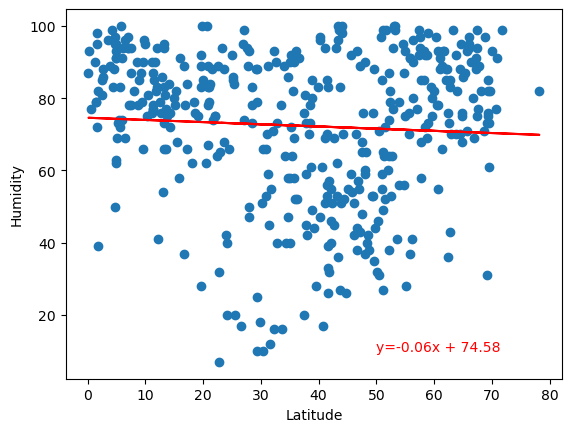

In [30]:
# Northern Hemisphere
x_value_n = northern_hemi_df['Lat']
y_value_n = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_n, y_value_n)
regress_value_n = x_value_n * slope + intercept
line_eq_n = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_n, y_value_n, marker='o')
plt.plot(x_value_n, regress_value_n, 'r')
plt.annotate(line_eq_n, (50,10), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0020149273831165768


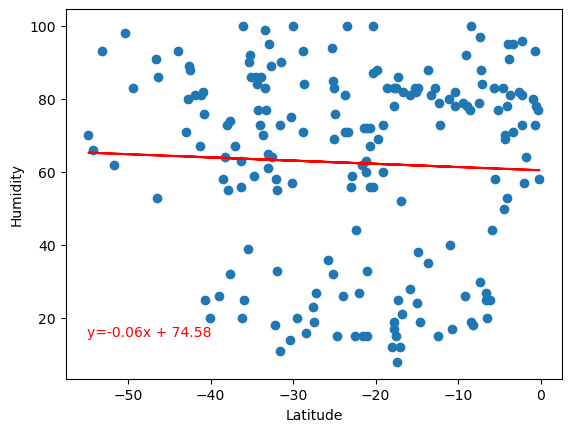

In [34]:
# Southern Hemisphere
x_value_s = southern_hemi_df['Lat']
y_value_s = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_s, y_value_s)
regress_value_s = x_value_s * slope + intercept
line_eq_s = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_s, y_value_s, marker='o')
plt.plot(x_value_s, regress_value_s, 'r')
plt.annotate(line_eq_n, (-55,15), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As the plots show, the data points for humidity is more scattered out than the temperature ones. The R values are close to 0 meaning that the linear regression cannot accurately represent these data. The slope of the linear regression is also close to 0, this could indicate that Latitude does not affect humidity much.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0017330823093519106


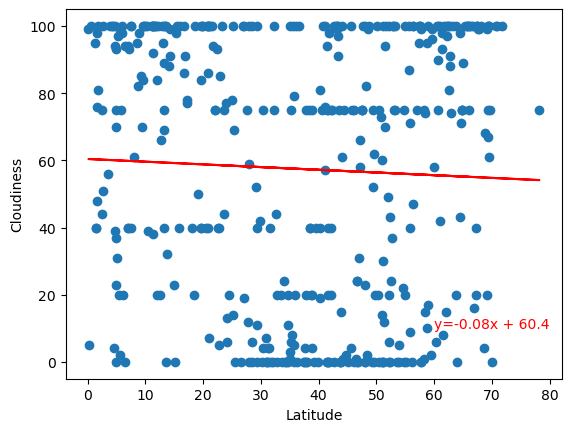

In [36]:
# Northern Hemisphere
x_value_n = northern_hemi_df['Lat']
y_value_n = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_n, y_value_n)
regress_value_n = x_value_n * slope + intercept
line_eq_n = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_n, y_value_n, marker='o')
plt.plot(x_value_n, regress_value_n, 'r')
plt.annotate(line_eq_n, (60,10), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.017845212171504275


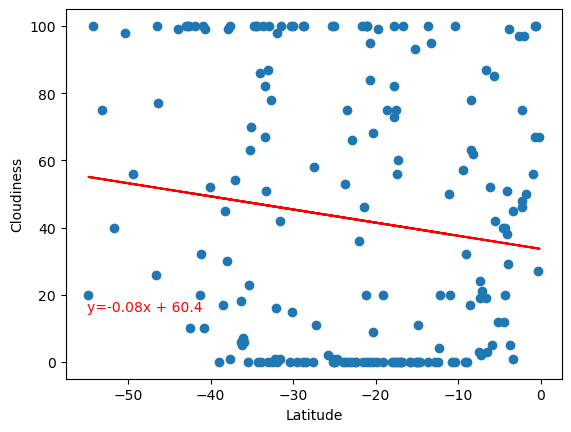

In [38]:
# Southern Hemisphere
x_value_s = southern_hemi_df['Lat']
y_value_s = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_s, y_value_s)
regress_value_s = x_value_s * slope + intercept
line_eq_s = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_s, y_value_s, marker='o')
plt.plot(x_value_s, regress_value_s, 'r')
plt.annotate(line_eq_n, (-55,15), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The data points are all pretty spread out and the r value is close to 0, so the linear regressions cannot accurately represent or predict the cloudiness of a city based on its Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0004686288633550458


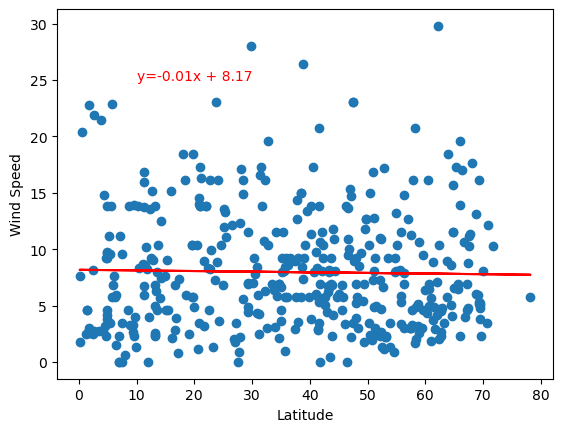

In [40]:
# Northern Hemisphere
x_value_n = northern_hemi_df['Lat']
y_value_n = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_n, y_value_n)
regress_value_n = x_value_n * slope + intercept
line_eq_n = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_n, y_value_n, marker='o')
plt.plot(x_value_n, regress_value_n, 'r')
plt.annotate(line_eq_n, (10,25), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0060036381154415855


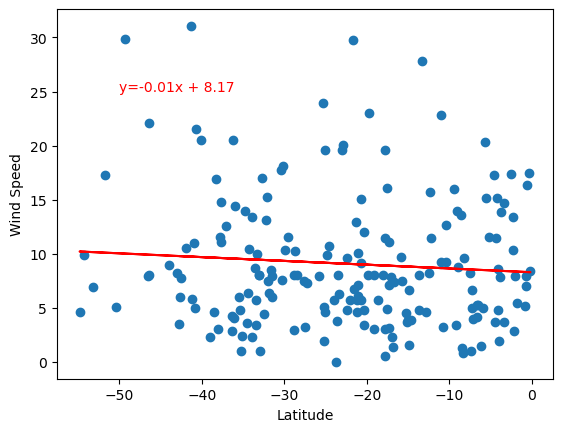

In [42]:
# Southern Hemisphere
x_value_s = southern_hemi_df['Lat']
y_value_s = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_s, y_value_s)
regress_value_s = x_value_s * slope + intercept
line_eq_s = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#Plot
plt.scatter(x_value_s, y_value_s, marker='o')
plt.plot(x_value_s, regress_value_s, 'r')
plt.annotate(line_eq_n, (-50,25), color = 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** As we can see from the plots, the average wind speed is about 8 to 9 m/s. There are a few outliers. But mostly, the linear regressions cannot really represent or predict the wind speed as its r-value is close to 0.